<a href="https://www.kaggle.com/code/aerospacer/time-series?scriptVersionId=126184213" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#https://www.kaggle.com/datasets/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/code?datasetId=4538&sortBy=voteCount

#https://www.kaggle.com/code/janiobachmann/s-p-500-time-series-forecasting-with-prophet

#https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm

#https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python

#https://www.kaggle.com/code/shreyasajal/pytorch-forecasting-for-time-series-forecasting

In [2]:
"""
Encoder input layer : nn.Linear()
Positional encoding layer : custom class inheriting from nn.Module
Encoder layer : nn.TransformerEncoderLayer()
Encoder : nn.TransformerEncoder()
Decoder input layer : nn.Linear()
Decoder layer : nn.TransformerDecoderLayer()
Decoder : nn.TransformerDecoder()
Linear mapping : nn.Linear()

"""

'\nEncoder input layer : nn.Linear()\nPositional encoding layer : custom class inheriting from nn.Module\nEncoder layer : nn.TransformerEncoderLayer()\nEncoder : nn.TransformerEncoder()\nDecoder input layer : nn.Linear()\nDecoder layer : nn.TransformerDecoderLayer()\nDecoder : nn.TransformerDecoder()\nLinear mapping : nn.Linear()\n\n'

In [3]:
!pip install -q yfinance

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

In [5]:
yf


<module 'yfinance' from '/opt/conda/lib/python3.7/site-packages/yfinance/__init__.py'>

In [6]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN','TSLA']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN, TSLA]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON","TESLA"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-04-03,199.910004,202.690002,192.199997,194.770004,194.770004,169545900,TESLA
2023-04-04,197.320007,198.740005,190.320007,192.580002,192.580002,126463800,TESLA
2023-04-05,190.520004,190.679993,183.759995,185.520004,185.520004,133882500,TESLA
2023-04-06,183.080002,186.389999,179.740005,185.059998,185.059998,123857900,TESLA
2023-04-10,179.940002,185.100006,176.110001,184.509995,184.509995,142154600,TESLA
2023-04-11,186.690002,189.190002,185.649994,186.789993,186.789993,115770900,TESLA
2023-04-12,190.740005,191.580002,180.309998,180.539993,180.539993,150256300,TESLA
2023-04-13,182.960007,186.500000,180.940002,185.899994,185.899994,112933000,TESLA
2023-04-14,183.949997,186.279999,182.009995,185.000000,185.000000,96306500,TESLA


In [7]:
df.sample(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-03-31,283.730011,289.269989,283.000000,288.299988,288.299988,32740300,MICROSOFT
2022-08-15,301.786682,313.133331,301.230011,309.320007,309.320007,89359200,TESLA
2023-04-04,197.320007,198.740005,190.320007,192.580002,192.580002,126463800,TESLA
2022-11-16,98.019997,99.849998,97.902000,98.989998,98.989998,24660200,GOOGLE
2022-08-19,140.470001,141.110001,137.910004,138.229996,138.229996,47792800,AMAZON
2022-08-08,142.050003,144.229996,138.289993,139.410004,139.410004,52229000,AMAZON
2023-03-17,184.520004,186.220001,177.330002,180.130005,180.130005,133197100,TESLA
2022-05-25,207.949997,223.106674,207.669998,219.600006,219.600006,92139300,TESLA
2022-09-06,256.200012,257.829987,251.940002,253.250000,251.907349,21328200,MICROSOFT


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2022-04-18 to 2023-04-17
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1255 non-null   float64
 1   High          1255 non-null   float64
 2   Low           1255 non-null   float64
 3   Close         1255 non-null   float64
 4   Adj Close     1255 non-null   float64
 5   Volume        1255 non-null   int64  
 6   company_name  1255 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 78.4+ KB


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1.255000e+03
mean,168.729696,171.561787,165.791555,168.686223,168.365658,6.489052e+07
std,67.428222,68.519722,66.038242,67.203170,66.898628,4.311485e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,8.567800e+06
25%,110.444748,112.933998,108.089375,110.515003,110.515003,2.974080e+07
50%,147.070007,149.050003,145.009995,147.110001,146.710007,5.705380e+07
75%,236.828331,241.315002,233.726662,237.244995,236.538330,8.445200e+07
max,358.243347,364.073334,332.140015,342.716675,342.716675,3.065906e+08


In [10]:
TSLA.describe()
#We have only 255 records in one year because weekends are not included in the data.

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,223.559894,228.881381,217.249987,222.848606,222.848606,1.124271e+08
std,55.262405,55.959135,53.820708,54.535622,54.535622,4.901768e+07
min,103.000000,111.750000,101.809998,108.099998,108.099998,4.186470e+07
25%,186.160004,190.839996,180.919998,185.709999,185.709999,7.612970e+07
50%,220.473328,226.259995,212.686661,220.190002,220.190002,9.630650e+07
75%,272.023331,275.748337,262.130005,268.321655,268.321655,1.429730e+08
max,358.243347,364.073334,332.140015,342.716675,342.716675,3.065906e+08


<Figure size 1500x1000 with 0 Axes>

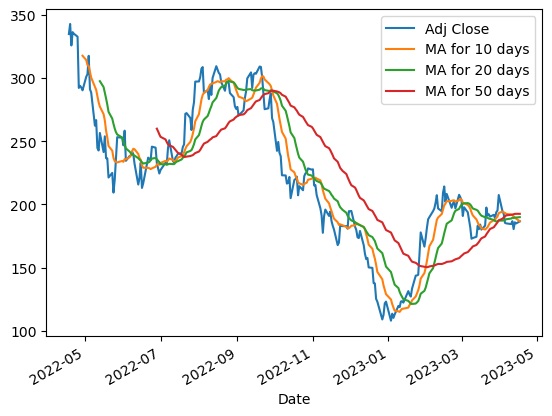

In [11]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
#fig.set_title('TESLA')

fig.tight_layout()

In [12]:
# prediction

# Get the stock quote
df = pdr.get_data_yahoo('TSLA', start='2018-01-01', end='2023-01-01')
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000
...,...,...,...,...,...,...
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500


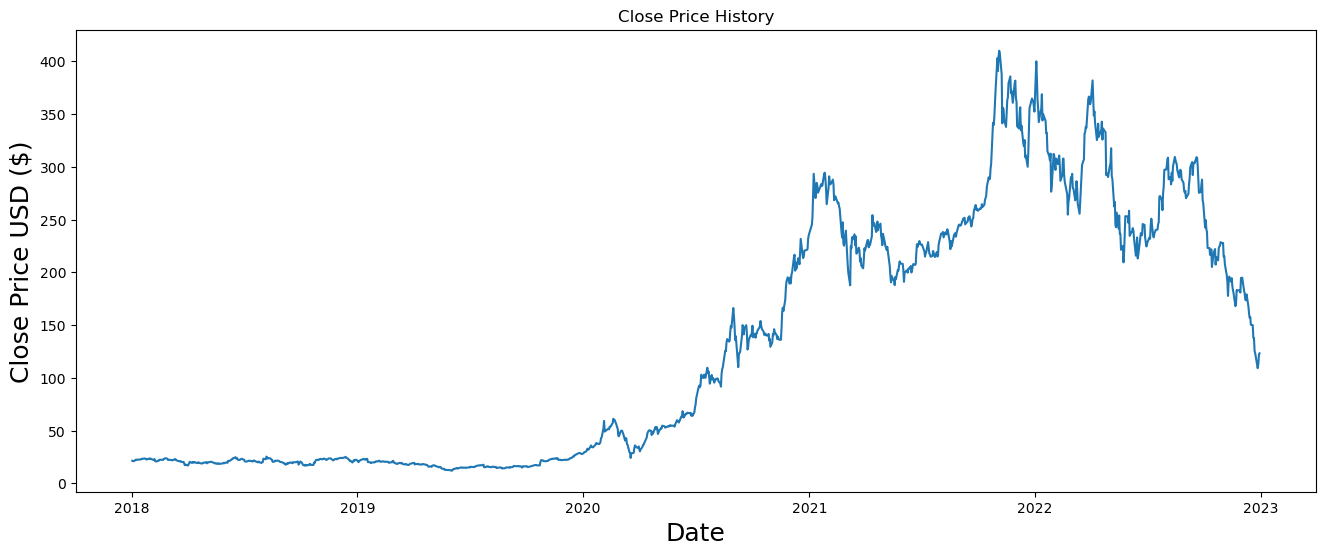

In [13]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [14]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .80 ))

training_data_len

1008

In [15]:
data

,Close
Date,
2018-01-02,21.368668
2018-01-03,21.150000
2018-01-04,20.974667
2018-01-05,21.105333
2018-01-08,22.427334
...,...
2022-12-23,123.150002
2022-12-27,109.099998
2022-12-28,112.709999


In [16]:
dataset

array([[ 21.3686676 ],
       [ 21.14999962],
       [ 20.9746666 ],
       ...,
       [112.70999908],
       [121.81999969],
       [123.18000031]])

In [17]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02370959],
       [0.02316023],
       [0.02271974],
       ...,
       [0.25318813],
       [0.27607536],
       [0.27949211]])

In [18]:
dataset

array([[ 21.3686676 ],
       [ 21.14999962],
       [ 20.9746666 ],
       ...,
       [112.70999908],
       [121.81999969],
       [123.18000031]])

In [19]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [20]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=50, epochs=10)

Epoch 1/10
19/19 [==============================] - 7s 124ms/step - loss: 0.0168
Epoch 2/10
19/19 [==============================] - 2s 124ms/step - loss: 0.0022
Epoch 3/10
19/19 [==============================] - 2s 131ms/step - loss: 0.0014
Epoch 4/10
19/19 [==============================] - 3s 149ms/step - loss: 0.0011
Epoch 5/10
19/19 [==============================] - 2s 128ms/step - loss: 0.0011
Epoch 6/10
19/19 [==============================] - 2s 123ms/step - loss: 9.7766e-04
Epoch 7/10
19/19 [==============================] - 2s 128ms/step - loss: 9.7882e-04
Epoch 8/10
19/19 [==============================] - 2s 123ms/step - loss: 9.2419e-04
Epoch 9/10
19/19 [==============================] - 2s 122ms/step - loss: 8.8085e-04
Epoch 10/10
19/19 [==============================] - 2s 122ms/step - loss: 8.2918e-04


In [21]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

8/8 [==============================] - 1s 36ms/step


20.758801348394254

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2018-01-02 to 2022-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1259 non-null   float64
dtypes: float64(1)
memory usage: 19.7 KB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


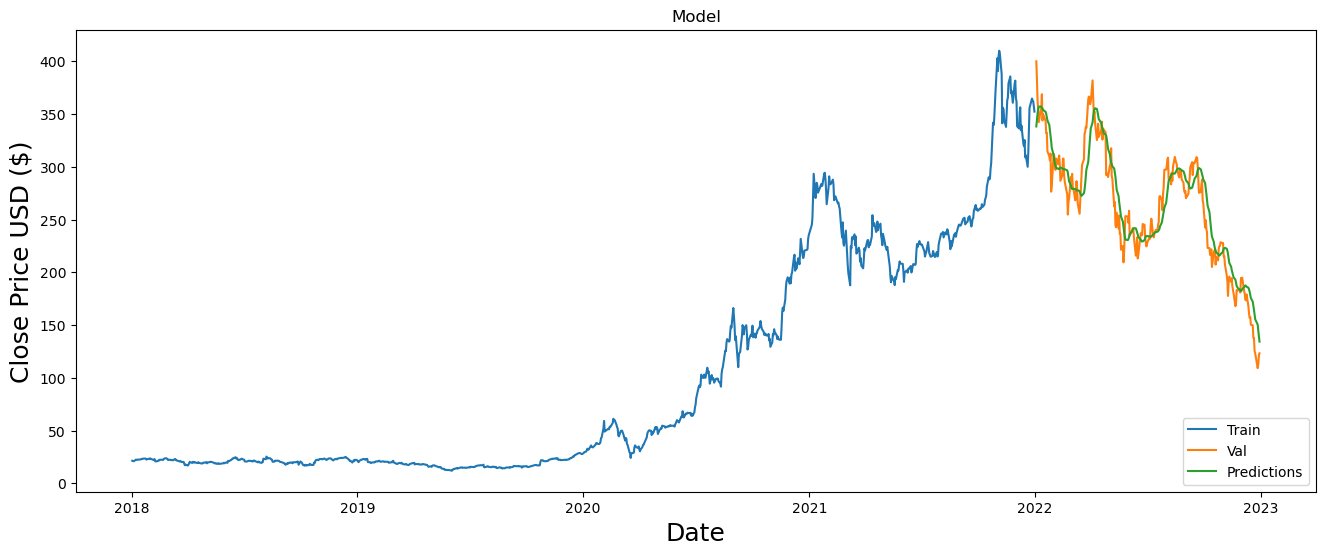

In [23]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# ARIMA

In [51]:
import statsmodels.api as sm

model = sm.tsa.arima.ARIMA(train_data, order=(1, 1, 1))  
fitted = model.fit()
arima_preds = fitted.forecast(steps=len(test_data))

print(fitted.summary())

array([0.85501411, 0.85501411, 0.85501411, 0.85501411, 0.85501411,
       0.85501411, 0.85501411, 0.85501411, 0.85501411, 0.85501411,
       0.85501411, 0.85501411, 0.85501411, 0.85501411, 0.85501411,
       0.85501411, 0.85501411, 0.85501411, 0.85501411, 0.85501411,
       0.85501411, 0.85501411, 0.85501411, 0.85501411, 0.85501411,
       0.85501411, 0.85501411, 0.85501411, 0.85501411, 0.85501411,
       0.85501411, 0.85501411, 0.85501411, 0.85501411, 0.85501411,
       0.85501411, 0.85501411, 0.85501411, 0.85501411, 0.85501411,
       0.85501411, 0.85501411, 0.85501411, 0.85501411, 0.85501411,
       0.85501411, 0.85501411, 0.85501411, 0.85501411, 0.85501411,
       0.85501411, 0.85501411, 0.85501411, 0.85501411, 0.85501411,
       0.85501411, 0.85501411, 0.85501411, 0.85501411, 0.85501411,
       0.85501411, 0.85501411, 0.85501411, 0.85501411, 0.85501411,
       0.85501411, 0.85501411, 0.85501411, 0.85501411, 0.85501411,
       0.85501411, 0.85501411, 0.85501411, 0.85501411, 0.85501

In [44]:
fitted.forecast()

array([0.85501411])

In [38]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA (train_data, order=(5,1,0))
model_fit = model.fit()
#print(model_fit.summary())

# Make predictions using ARIMA
arima_preds = model.forecast(steps=len(test_data))[0]

# Calculate RMSE and MAE for ARIMA
arima_rmse = np.sqrt(mean_squared_error(test_data['Close'], arima_preds))
arima_mae = mean_absolute_error(test_data['Close'], arima_preds)
print(f"ARIMA RMSE: {arima_rmse:.2f}")
print(f"ARIMA MAE: {arima_mae:.2f}")


# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print (residuals.describe())

AttributeError: 'ARIMA' object has no attribute 'forecast'

In [ ]:
# Plot the train data, test data, and ARIMA predictions
plt.figure(figsize=(14, 6))
plt.plot(data.index[:train_size], train_data['Close'], label='Train Data', color='blue')
plt.plot(data.index[train_size:], test_data['Close'], label='Test Data', color='green')
plt.plot(data.index[train_size:], arima_preds, label='ARIMA Predictions', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Tesla Closing Price with ARIMA Predictions')
plt.legend()
plt.show()


In [25]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [26]:
arima_model = ARIMA(train_data)#, order=best_pdq)
arima_model_fit = arima_model.fit()

# Make predictions using ARIMA
arima_preds = arima_model_fit.forecast(steps=len(test_data))[0]


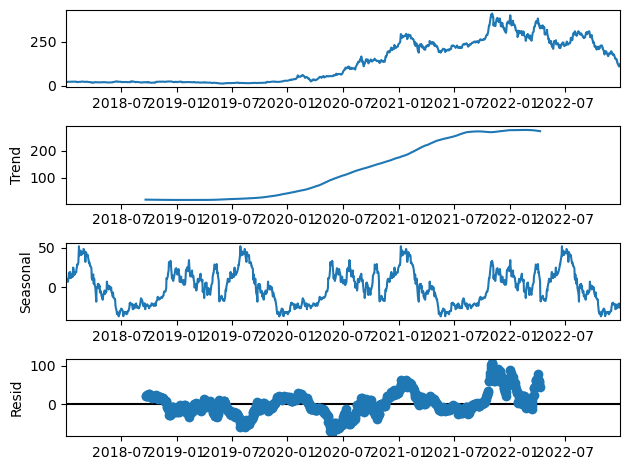

In [27]:
result = seasonal_decompose(data, model='additive',period=365) # The frequncy is daily
figure = result.plot()

In [28]:
#valid = np.reshape(valid.Close.values, (valid.shape[0], valid.Close.shape[0], 1))

In [29]:
valid

,Close,Predictions
Date,,
2022-01-03,399.926666,338.188324
2022-01-04,383.196655,344.305725
2022-01-05,362.706665,350.231567
2022-01-06,354.899994,354.474701
2022-01-07,342.320007,356.887787
...,...,...
2022-12-23,123.150002,155.439804
2022-12-27,109.099998,150.409622
2022-12-28,112.709999,144.684830


In [30]:
valid.Close

Date
2022-01-03    399.926666
2022-01-04    383.196655
2022-01-05    362.706665
2022-01-06    354.899994
2022-01-07    342.320007
                 ...    
2022-12-23    123.150002
2022-12-27    109.099998
2022-12-28    112.709999
2022-12-29    121.820000
2022-12-30    123.180000
Name: Close, Length: 251, dtype: float64

In [31]:
valid['Close']

Date
2022-01-03    399.926666
2022-01-04    383.196655
2022-01-05    362.706665
2022-01-06    354.899994
2022-01-07    342.320007
                 ...    
2022-12-23    123.150002
2022-12-27    109.099998
2022-12-28    112.709999
2022-12-29    121.820000
2022-12-30    123.180000
Name: Close, Length: 251, dtype: float64

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1008 entries, 2018-01-02 to 2021-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1008 non-null   float64
dtypes: float64(1)
memory usage: 15.8 KB


In [33]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-01-03 to 2022-12-30
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close        251 non-null    float64
 1   Predictions  251 non-null    float32
dtypes: float32(1), float64(1)
memory usage: 4.9 KB


In [34]:
train = train
valid = valid.Close


history = [x for x in train]
predictions = list('train')

# walk-forward validation
for t in range(len(valid)):
    model = ARIMA(history, order=(3,1,3))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
# evaluate forecasts
rolling_mse = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % rolling_mse)

In [ ]:
train = df_train['Close'].values
test = df_valid['Close'].values

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]

In [ ]:
stocks_data=data
df_train = stocks_data[stocks_data.Date < 2021]
df_valid = stocks_data[stocks_data.Date >= 2021]

In [ ]:
train = df_train['Close'].values
test = df_valid['Close'].values

In [ ]:
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(valid)):
    model = ARIMA(history, order=(3,1,3))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

## TimeSeriesTransformer

In [ ]:
self.encoder_input_layer = nn.Linear(
  in_features=input_size, 
  out_features=dim_val
)

In [ ]:
# Positional Encoder

import torch
import torch.nn as nn 
import math
from torch import nn, Tensor

class PositionalEncoder(nn.Module):
    """
    The authors of the original transformer paper describe very succinctly what 
    the positional encoding layer does and why it is needed:
    
    "Since our model contains no recurrence and no convolution, in order for the 
    model to make use of the order of the sequence, we must inject some 
    information about the relative or absolute position of the tokens in the 
    sequence." (Vaswani et al, 2017)
    Adapted from: 
    https://pytorch.org/tutorials/beginner/transformer_tutorial.html
    """

    def __init__(
        self, 
        dropout: float=0.1, 
        max_seq_len: int=5000, 
        d_model: int=512,
        batch_first: bool=False
        ):

        """
        Parameters:
            dropout: the dropout rate
            max_seq_len: the maximum length of the input sequences
            d_model: The dimension of the output of sub-layers in the model 
                     (Vaswani et al, 2017)
        """

        super().__init__()

        self.d_model = d_model
        
        self.dropout = nn.Dropout(p=dropout)

        self.batch_first = batch_first

        self.x_dim = 1 if batch_first else 0

        # copy pasted from PyTorch tutorial
        position = torch.arange(max_seq_len).unsqueeze(1)
        
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        
        pe = torch.zeros(max_seq_len, 1, d_model)
        
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        
        self.register_buffer('pe', pe)
        
    def forward(self, x: Tensor) -> Tensor:
        """
        Args:
            x: Tensor, shape [batch_size, enc_seq_len, dim_val] or 
               [enc_seq_len, batch_size, dim_val]
        """

        x = x + self.pe[:x.size(self.x_dim)]

        return self.dropout(x)

In [ ]:
# Positional Encoder

import positional_encoder as pe

# Create positional encoder
self.positional_encoding_layer = pe.PositionalEncoder(
    d_model=dim_val,
    dropout=dropout_pos_enc,
    max_seq_len=max_seq_len
    )

#The encoder input layer produces an output of size dim_val.

In [ ]:
# Create an encoder layer

encoder_layer = nn.TransformerEncoderLayer(
    d_model=dim_val,
    nhead=n_heads, 
    batch_first=True
    )

# Stack the encoder layer n times in nn.TransformerDecoder
self.encoder = nn.TransformerEncoder(
    encoder_layer=encoder_layer,
    num_layers=n_encoder_layers, 
    norm=None
)

self.decoder_input_layer = nn.Linear(
  in_features=num_predicted_features, # the number of features you want to predict. Usually just 1 
  out_features=dim_val
) 

In [ ]:

# Create the decoder layer
decoder_layer = nn.TransformerDecoderLayer(
  d_model=dim_val, 
  nhead=n_heads,
  batch_first=True
  )

# Stack the decoder layer n times
self.decoder = nn.TransformerDecoder(
  decoder_layer=decoder_layer,
  num_layers=n_decoder_layers, 
  norm=None
  )

self.linear_mapping = nn.Linear(
  in_features=dim_val,
  out_features=num_predicted_features
  )